In [1]:
library(caret)
# e1071: 各类计量经济和机器学习的延伸；我们通过naiveBayes()函数进行朴素贝叶斯判别
library(e1071)
# gridExtra: 绘图辅助功能，讲不同的图形组合在一起成为图表
library(gridExtra) 
# lattice: 建立在核心绘图能力上的格子框架图形
library(lattice)
# imputeMissings: 填补缺失值
library(imputeMissings)
# RANN: 应用k邻近算法
library(RANN)
# corrplot: 相关矩阵的高级可视化
library(corrplot)
# nnet: 拟合单个潜层级的神经网络模型
library(nnet)
# car: 回归模型解释和可视化工具，其它附加功能； 其中包括some()和scatterplotMatrix()函数
library(car)
# gpairs: 广义散点图；对混合类别和连续变量产生散点图矩阵
library(gpairs)
# reshape2: 灵活重构和整合数据，主要有两个函数melt()和dcast()
library(reshape2)
# psych: 心理计量学方法和抽样调查分析，尤其是因子分析和项目反应模型；
# 我们会使用包中的describe()函数
library(psych)
# plyr: 可以将数据分割成更小的数据，然后对分割后的数据进行些操作，最后把操作的结果汇总
library(plyr)
# tidyr: 清理揉合数据的包，主要函数是spread()和gather()
library(tidyr)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'imputeMissings'


The following object is masked from 'package:e1071':

    impute


corrplot 0.84 loaded

Loading required package: carData


Attaching package: 'psych'


The following object is masked from 'package:car':

    logit


The following objects are masked from 'package:ggplot2':

    %+%, alpha



Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths




In [2]:
sim.dat <- read.csv("data/SegData.csv")

In [3]:
summary(sim.dat)

      age            gender        income       house       store_exp      
 Min.   : 16.00   Female:554   Min.   : 41776   No :432   Min.   : -500.0  
 1st Qu.: 25.00   Male  :446   1st Qu.: 85832   Yes:568   1st Qu.:  205.0  
 Median : 36.00                Median : 93869             Median :  329.0  
 Mean   : 38.84                Mean   :113543             Mean   : 1356.8  
 3rd Qu.: 53.00                3rd Qu.:124572             3rd Qu.:  597.3  
 Max.   :300.00                Max.   :319704             Max.   :50000.0  
                               NA's   :184                                 
   online_exp       store_trans     online_trans         Q1       
 Min.   :  68.82   Min.   : 1.00   Min.   : 1.00   Min.   :1.000  
 1st Qu.: 420.34   1st Qu.: 3.00   1st Qu.: 6.00   1st Qu.:2.000  
 Median :1941.86   Median : 4.00   Median :14.00   Median :3.000  
 Mean   :2120.18   Mean   : 5.35   Mean   :13.55   Mean   :3.101  
 3rd Qu.:2440.78   3rd Qu.: 7.00   3rd Qu.:20.00   3rd Qu

In [4]:
sim.dat

age,gender,income,house,store_exp,online_exp,store_trans,online_trans,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,segment
<int>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
57,Female,120963.4,Yes,529.1344,303.5125,2,2,4,2,1,2,1,4,1,4,2,4,Price
63,Female,122008.1,Yes,478.0058,109.5297,4,2,4,1,1,2,1,4,1,4,1,4,Price
59,Male,114202.3,Yes,490.8107,279.2496,7,2,5,2,1,2,1,4,1,4,1,4,Price
60,Male,113616.3,Yes,347.8090,141.6698,10,2,5,2,1,3,1,4,1,4,2,4,Price
51,Male,124252.6,Yes,379.6259,112.2372,4,4,4,1,1,3,1,4,1,4,2,4,Price
59,Male,107661.5,Yes,338.3154,195.6870,4,5,4,2,1,2,1,4,1,4,1,4,Price
57,Male,120483.3,Yes,482.5445,284.5363,5,3,4,1,1,2,1,4,1,4,1,4,Price
57,Male,110542.0,Yes,340.7368,135.2556,11,5,5,2,1,3,1,4,1,4,2,4,Price
61,Female,132060.5,Yes,608.2310,142.5503,6,1,4,1,1,2,1,4,1,4,1,4,Price


In [5]:
sim.dat$age[sim.dat$age > 100] <- NA

In [6]:
sim.dat$store_exp[sim.dat$store_exp < 0] <- NA

In [7]:
summary(subset(sim.dat, select = c("age", "income")))

      age            income      
 Min.   :16.00   Min.   : 41776  
 1st Qu.:25.00   1st Qu.: 85832  
 Median :36.00   Median : 93869  
 Mean   :38.58   Mean   :113543  
 3rd Qu.:53.00   3rd Qu.:124572  
 Max.   :69.00   Max.   :319704  
 NA's   :1       NA's   :184     

In [8]:
demo_imp <- impute(sim.dat, method = "median/mode")

In [9]:
summary(demo_imp[, 1:5])

      age           gender        income       house       store_exp      
 Min.   :16.00   Female:554   Min.   : 41776   No :432   Min.   :  155.8  
 1st Qu.:25.00   Male  :446   1st Qu.: 87896   Yes:568   1st Qu.:  205.1  
 Median :36.00                Median : 93869             Median :  329.8  
 Mean   :38.58                Mean   :109923             Mean   : 1357.7  
 3rd Qu.:53.00                3rd Qu.:119456             3rd Qu.:  597.3  
 Max.   :69.00                Max.   :319704             Max.   :50000.0  

In [10]:
lapply(sim.dat, class) == "factor"

age       gender       income        house    store_exp   online_exp 
       FALSE         TRUE        FALSE         TRUE        FALSE        FALSE 
 store_trans online_trans           Q1           Q2           Q3           Q4 
       FALSE        FALSE        FALSE        FALSE        FALSE        FALSE 
          Q5           Q6           Q7           Q8           Q9          Q10 
       FALSE        FALSE        FALSE        FALSE        FALSE        FALSE 
     segment 
        TRUE

In [11]:
ldx <- which(lapply(sim.dat, class) == "factor")

In [12]:
ldx

gender   house segment 
      2       4      19

In [13]:
typeof(ldx)

[1] "integer"

In [14]:
attributes(ldx)

$names
[1] "gender"  "house"   "segment"

In [15]:
imp <- preProcess(sim.dat, method="knnImpute", k=5)

In [16]:
demo_imp <- predict(imp, sim.dat[, -ldx])

In [17]:
demo_imp

age,income,store_exp,online_exp,store_trans,online_trans,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.2981451,0.148876309,-0.2989280,-1.049355,-0.90649341,-1.451057,0.6199408,0.1514960,-0.707507,-0.6605714,-1.514353,1.07888,-1.671771,1.389530,-0.9700555,1.478647
1.7209611,0.169836502,-0.3173516,-1.161404,-0.36530332,-1.451057,0.6199408,-0.7044137,-0.707507,-0.6605714,-1.514353,1.07888,-1.671771,1.389530,-1.8641158,1.478647
1.4390838,0.013226321,-0.3127375,-1.063370,0.44648183,-1.451057,1.3095300,0.1514960,-0.707507,-0.6605714,-1.514353,1.07888,-1.671771,1.389530,-1.8641158,1.478647
1.5095531,0.001470074,-0.3642665,-1.142839,1.25826698,-1.451057,1.3095300,0.1514960,-0.707507,0.2051840,-1.514353,1.07888,-1.671771,1.389530,-0.9700555,1.478647
0.8753292,0.214867498,-0.3528017,-1.159840,-0.36530332,-1.199705,0.6199408,-0.7044137,-0.707507,0.2051840,-1.514353,1.07888,-1.671771,1.389530,-0.9700555,1.478647
1.4390838,-0.118004398,-0.3676874,-1.111638,-0.36530332,-1.074028,0.6199408,0.1514960,-0.707507,-0.6605714,-1.514353,1.07888,-1.671771,1.389530,-1.8641158,1.478647
1.2981451,0.139243425,-0.3157161,-1.060316,-0.09470827,-1.325381,0.6199408,-0.7044137,-0.707507,-0.6605714,-1.514353,1.07888,-1.671771,1.389530,-1.8641158,1.478647
1.2981451,-0.060210246,-0.3668149,-1.146544,1.52886203,-1.074028,1.3095300,0.1514960,-0.707507,0.2051840,-1.514353,1.07888,-1.671771,1.389530,-0.9700555,1.478647
1.5800224,0.371521235,-0.2704264,-1.142331,0.17588678,-1.576733,0.6199408,-0.7044137,-0.707507,-0.6605714,-1.514353,1.07888,-1.671771,1.389530,-1.8641158,1.478647


In [18]:
income <- sim.dat$income

In [19]:
mux <- mean(income, na.rm = T)

In [20]:
sdx <- sd(income, na.rm = T)

In [21]:
tr1 <- income - mux

In [22]:
tr2 <- tr1/sdx

In [23]:
tr2

[1]  0.148876309  0.169836502  0.013226321  0.001470074  0.214867498
   [6] -0.118004398  0.139243425 -0.060210246  0.371521235 -0.170423391
  [11] -0.127328222           NA  0.109884543           NA  0.019989844
  [16]           NA  0.391938278  0.043448841 -0.006661416  0.325643337
  [21]           NA  0.216957990  0.192081449           NA           NA
  [26]           NA  0.287778724  0.047796329           NA -0.018501597
  [31]           NA  0.165122485  0.268039542  0.295153241           NA
  [36]           NA  0.092828184  0.112449282  0.246805449  0.293949927
  [41]           NA           NA  0.176459644  0.019580859  0.198953667
  [46]  0.242413811 -0.260013526           NA  0.302213817  0.015924749
  [51]  0.167448025  0.241215596           NA -0.039111542 -0.080709508
  [56]           NA  0.225698003  0.075884430           NA  0.150279309
  [61]  0.078867342  0.121457080  0.059467940  0.249401154 -0.050478874
  [66]           NA  0.236563298  0.038835559           NA  0.057991690
  [71]           NA  0.279981512  0.086587074  0.402150857           NA
  [76]  0.333214094  0.231592182           NA           NA  0.102512926
  [81]           NA  0.085744483           NA           NA  0.284365467
  [86]           NA           NA  0.153064092  0.037166014  0.207124883
  [91] -0.004847052  0.399677878  0.118959566  0.118723449  0.114157051
  [96]           NA           NA           NA  0.151386545  0.235914562
 [101]           NA           NA -0.137056840           NA  0.286432494
 [106]  0.315292517  0.075713843  0.004873382  0.036045239  0.185526841
 [111]  0.261547017  0.262986025           NA           NA -0.040467624
 [116]  0.180711602  0.066015339  0.278459714  0.347349973  0.221706114
 [121]  0.072588842 -0.025136686  0.218200693           NA           NA
 [126]  0.274092047  0.059114141  0.152021094  0.155015672           NA
 [131]  0.389587724           NA           NA  0.296815701  0.158763128
 [136]  0.246395600  0.137635155 -0.107983819  0.324461186           NA
 [141]  0.155480844  0.214826549           NA           NA  0.056254248
 [146]  0.020193068  0.173396607  0.217455946  0.124943007           NA
 [151]  0.022873830           NA -0.005133543  0.328262689  0.098944844
 [156]           NA  0.258215321           NA           NA  0.205509510
 [161] -0.042839803           NA  0.319533621           NA           NA
 [166]  0.255388884 -0.103272062           NA -0.097183432 -0.011193101
 [171]           NA           NA           NA           NA  0.359258493
 [176]  0.047292678           NA -0.060844293           NA           NA
 [181]  0.221191091  0.118469225  0.203911114  0.413371139 -0.040056723
 [186]  0.120312345  0.209315753  0.118724720  0.418825734  0.150529901
 [191]  0.124975740 -0.137140236           NA           NA  0.059640108
 [196]  0.227917745 -0.043709699  0.118907581  0.101717368  0.101638826
 [201] -0.283567594  0.220914588           NA  0.120558055  0.103603860
 [206] -0.144114515  0.422005355           NA           NA  0.272427931
 [211]           NA           NA  0.206685639  0.406802903 -0.181003206
 [216]  0.020335334           NA  0.168470660           NA           NA
 [221]           NA  0.262889609  0.083550841  0.638055957  0.343760348
 [226]  0.104103711  0.251174818  0.035301343           NA  0.101965837
 [231]  0.009677520 -0.130487810           NA  0.270835260  0.201928064
 [236]  0.557878484 -0.174099627           NA  0.137744811  0.199872265
 [241]  0.015973604  0.036172156           NA           NA           NA
 [246]  0.168408272           NA           NA  0.285910877  0.259543174
 [251]           NA  1.351212835  1.552855309 -0.141646918  2.277467254
 [256]  2.379452072           NA           NA           NA  2.640993097
 [261]           NA  1.687520553  3.768987587  1.517909063           NA
 [266]  2.939155898  1.462863682  2.190803761  1.521526908  1.268835635
 [271]  1.683019486           NA -0.495536997  3.090183402  1.319828810
 [276]           NA  1.084826886  1.2626166

In [24]:
summary(data.frame(cbind(income, tr1, tr2)))

     income            tr1              tr2         
 Min.   : 41776   Min.   :-71767   Min.   :-1.4399  
 1st Qu.: 85832   1st Qu.:-27711   1st Qu.:-0.5560  
 Median : 93869   Median :-19674   Median :-0.3947  
 Mean   :113543   Mean   :     0   Mean   : 0.0000  
 3rd Qu.:124572   3rd Qu.: 11029   3rd Qu.: 0.2213  
 Max.   :319704   Max.   :206161   Max.   : 4.1363  
 NA's   :184      NA's   :184      NA's   :184      

In [25]:
sdat <- subset(sim.dat, select = c("age", "income"))

In [26]:
cb <- cbind(income, tr1, tr2)

In [27]:
trans <- preProcess(sdat, method = c("center", "scale"))

In [28]:
transformed <- predict(trans, sdat)

In [29]:
qscale<-function(dat){
  for (i in 1:ncol(dat))
  {
    up<-quantile(dat[,i],0.99)
    low<-quantile(dat[,i],0.01)
    diff<-up-low
    dat[,i]<-(dat[,i]-low)/diff
  }
  return(dat)
}

In [30]:
demo_impl3 <- qscale(subset(demo_imp, select = c("income", "store_exp", "online_exp")))

In [31]:
summary(demo_impl3)

     income           store_exp           online_exp       
 Min.   :-0.05776   Min.   :-0.003407   Min.   :-0.006023  
 1st Qu.: 0.15206   1st Qu.: 0.003972   1st Qu.: 0.042719  
 Median : 0.18956   Median : 0.022582   Median : 0.253691  
 Mean   : 0.28253   Mean   : 0.176944   Mean   : 0.278417  
 3rd Qu.: 0.32706   3rd Qu.: 0.062849   3rd Qu.: 0.322871  
 Max.   : 1.23857   Max.   : 7.476996   Max.   : 1.298845  

In [32]:
set.seed(1000)

In [33]:
par(mfrow = c(1,2), oma = c(2, 2, 2, 2))

In [34]:
x1 <- rchisq(1000, 2, ncp = 0)

In [35]:
x1

[1]  0.468933463  1.828264992  1.843383301  3.037769127  8.340692906
   [6]  0.017521462  1.952987288  1.236171751  1.024745019  1.781647307
  [11]  1.065228992  1.799014673  1.180896158  0.942832839  2.233743551
  [16]  0.250474056  4.077414627  2.422497481  1.949085667  0.735147193
  [21]  0.226190067  0.092175072  3.992994622  1.279485796  0.939165440
  [26]  0.785758744  1.351171055  1.157994227  9.227143451  0.835666176
  [31]  1.641411820  0.087325035  0.397904661  9.697945790  0.397583096
  [36]  3.510337030  3.406833050  0.421790504  1.128616190 14.209089525
  [41]  2.153170906  1.444441065  3.928628340  0.787349305  1.230143133
  [46]  1.479838847  2.222801063  0.833606081  3.552763515  1.149217534
  [51]  5.166632095  3.925003949  0.779453911  1.760325208  0.785617962
  [56]  2.393359555  0.678676199  2.515000497  0.527532366  2.200407371
  [61]  0.479120794  0.846284089  1.195894895  1.929079887  1.542054265
  [66]  1.203031703  0.795528315  3.426082926  2.342977322  0.632693456
  [71]  1.351657535  2.911778669  1.455002338  0.188403862  8.586987651
  [76]  2.804087070  4.507949426  3.013976931  0.272761125  0.171972583
  [81]  3.009769462  1.272352640  0.989687712  0.049761245 11.744026572
  [86]  2.534978273  3.217291006  1.101204154  0.473647916  0.562954498
  [91]  0.142486471  1.047697437  2.258672216  0.106604238  4.778686911
  [96]  7.364281454  2.750826481  4.817911837  0.147359275  1.763913542
 [101]  0.311099145  1.570652042  2.525670848  1.482435728  0.775099767
 [106]  2.979796918  4.235433020  3.191737518  1.835543804  1.069722568
 [111]  0.399921613  0.037905932  0.523302927  1.341132535  0.653486619
 [116]  1.554409753  1.695708468  4.727998939  1.991662743  1.213182035
 [121]  1.544432372  0.116510429  0.183363422  0.734459387  0.644016630
 [126]  1.232699265  0.870783251  2.970935630  0.349782585  2.456397745
 [131]  0.813209500  2.014455732  2.777042940  0.405198028  0.413501673
 [136]  5.009849466  0.003375784  0.190494683  5.834300938  0.395169815
 [141]  1.810430852  0.455848085  4.718559348  3.099393206  0.427823614
 [146]  6.185444850  0.116660569  1.587376890  0.735606913  2.711875826
 [151]  0.555602566  2.393119689  0.009039216  0.595833713  7.059287316
 [156]  0.536880052  6.094621902  5.435234620  1.193104727  1.240379225
 [161]  2.320462446  4.801695939  1.454017856  1.397320275  1.395988103
 [166]  2.795059463  1.743976990  3.060152816  0.170295210  1.340170655
 [171]  0.800459140  4.777950964  0.018490079  2.418443262  1.449296962
 [176]  1.094519914  0.595665332  2.525605008  0.247294583  1.065782197
 [181]  0.835146740  0.194426981  7.088533103  1.999397732  1.711229439
 [186]  3.085513204  5.292960022  0.368571615  0.327976129  1.645278462
 [191]  1.165527340  2.214261007  2.669954359  2.014954087  1.163122477
 [196]  4.558386350  0.452128571  2.761101814  0.281166468  0.251972954
 [201]  0.368617924  1.989666039  0.903102820  1.613618440  0.310026692
 [206]  0.232808222  0.020778671  2.664620915  2.069137087  1.637514598
 [211]  2.215724556  0.151772731  0.830832821  0.642782475  6.015793793
 [216]  3.541211693  3.428393397  2.628461560  1.993448068  0.005203268
 [221]  1.235148921  5.730087220  0.946429747  2.878643593  2.318850922
 [226]  4.050622694  0.531810363  0.570468258  2.676075214  4.042891671
 [231]  1.052460309  0.019682355  2.587764890  1.071181498  2.607277149
 [236]  3.524204451  6.626630191  4.778527790  0.504853043  3.557799008
 [241]  0.286757464  3.798148717  2.382967682  6.324811202  1.325213274
 [246]  3.458406770  0.447646679  0.428079475  1.086454383 10.781222679
 [251]  0.716787898  1.837247207  0.406423121  7.111019306  0.018191461
 [256]  1.098762669  1.876923530  1.562735252  3.242462513  2.157416087
 [261]  0.548918558  6.363732063  0.115983110  2.167587223  0.220058011
 [266]  3.091369038  4.585753172  1.916062604  1.543388170  1.529334667
 [271]  0.901359589  4.049133506  0.884834512  1.686766532  3.265381613
 [276]  2.345467048  2.443621981  1.9899557

In [36]:
?rchisq

In [37]:
x2 <- max(x1)-x1

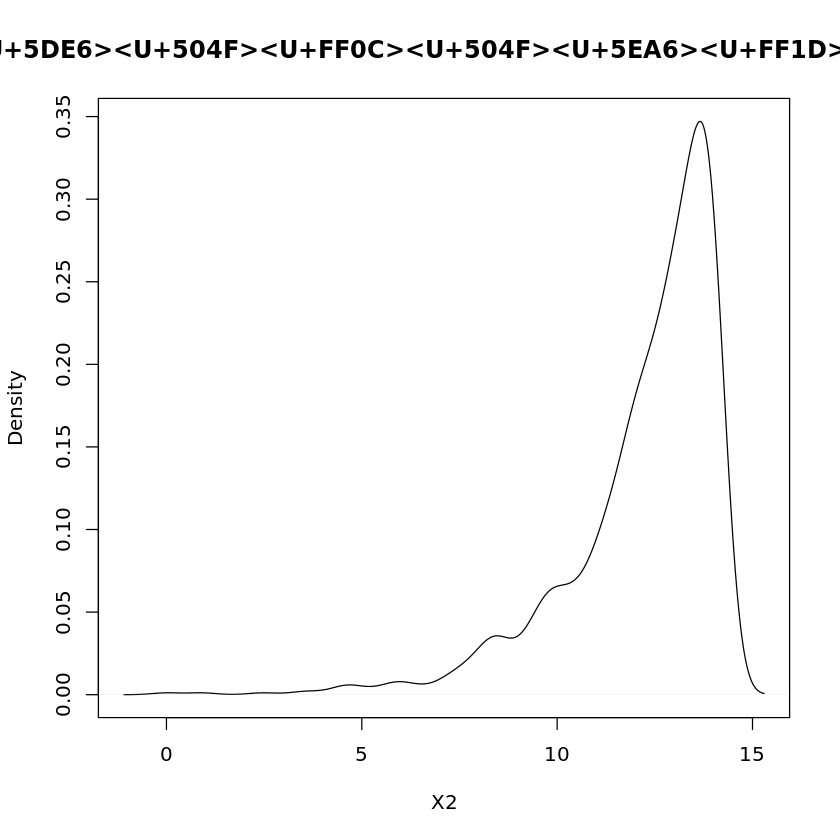

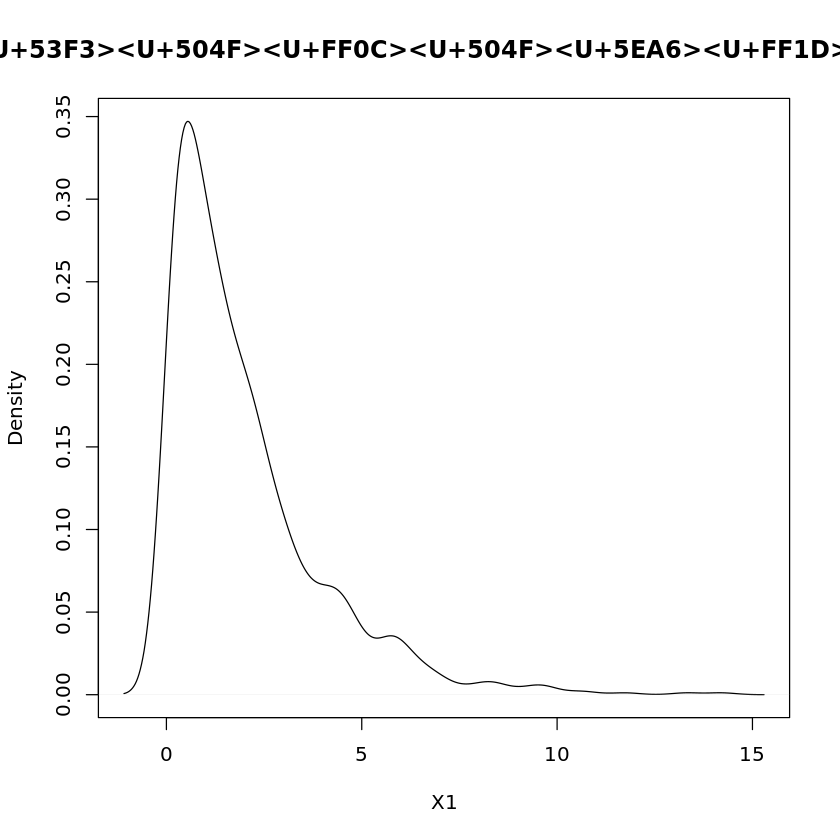

In [38]:
plot(density(x2),family ="Songti SC",main=paste("左偏，偏度＝",round(skewness(x2),2)), xlab="X2")
plot(density(x1),family ="Songti SC",main=paste("右偏，偏度＝",round(skewness(x1),2)), xlab="X1")

In [39]:
describe(sim.dat)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,999,38.57858,1.419057e+01,36.0000,37.67416,16.3086,16.00000,69.000,53.000,0.47337157,-1.1801326,4.489698e-01
gender*,2,1000,1.44600,4.973242e-01,1.0000,1.43250,0.0000,1.00000,2.000,1.000,0.21694502,-1.9548867,1.572677e-02
income,3,816,113543.06522,4.984229e+04,93868.6828,104841.93525,28989.4735,41775.63702,319704.338,277928.701,1.69442535,2.5732018,1.744829e+03
house*,4,1000,1.56800,4.956023e-01,2.0000,1.58500,0.0000,1.00000,2.000,1.000,-0.27413917,-1.9267715,1.567232e-02
store_exp,5,999,1358.70923,2.775166e+03,329.7955,845.13960,197.4732,155.81094,50000.000,49844.189,8.08437850,115.0356441,8.780238e+01
online_exp,6,1000,2120.18119,1.731224e+03,1941.8554,1874.51007,1015.2112,68.81723,9479.442,9410.625,1.18112888,1.3148731,5.474612e+01
store_trans,7,1000,5.35000,3.695559e+00,4.0000,4.88750,2.9652,1.00000,20.000,19.000,1.10613295,0.6947469,1.168638e-01
online_trans,8,1000,13.54600,7.956959e+00,14.0000,13.41750,10.3782,1.00000,36.000,35.000,0.03078309,-0.9783371,2.516211e-01
Q1,9,1000,3.10100,1.450139e+00,3.0000,3.12625,1.4826,1.00000,5.000,4.000,-0.12086326,-1.3566497,4.585741e-02


Created from 1000 samples and 2 variables

Pre-processing:
  - Box-Cox transformation (2)
  - ignored (0)

Lambda estimates for Box-Cox transformation:
0.1, 0.7

Box-Cox Transformation

1000 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    4.00    5.35    7.00   20.00 

Largest/Smallest: 20 
Sample Skewness: 1.11 

Estimated Lambda: 0.1 
With fudge factor, Lambda = 0 will be used for transformations


[1] -0.2154708

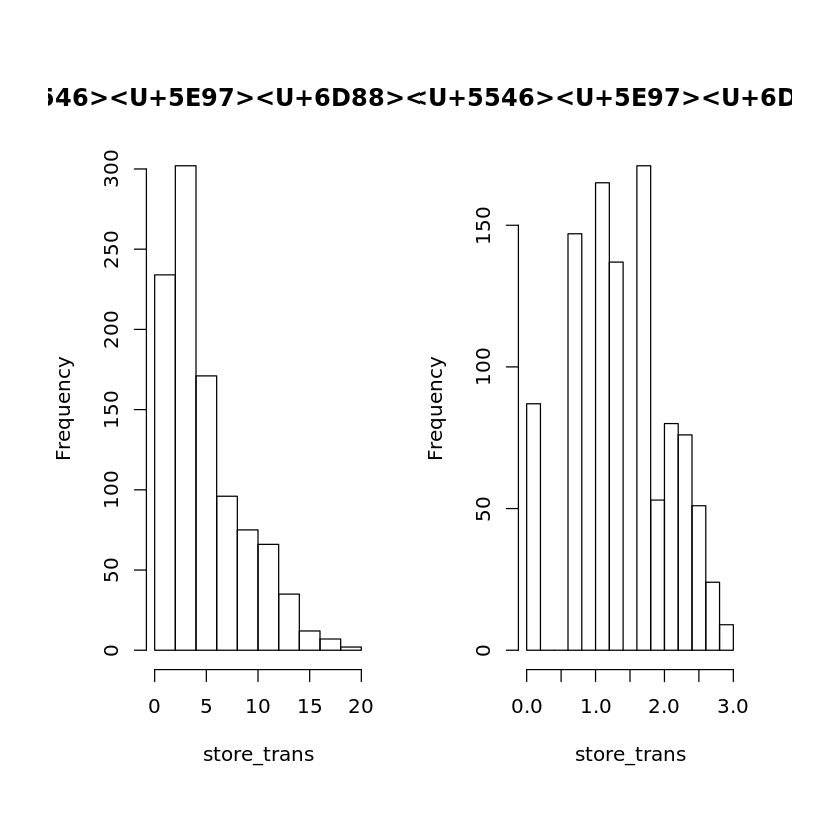

In [40]:
dat_bc<-subset(sim.dat,select=c("store_trans","online_trans"))
(trans<-preProcess(dat_bc,method=c("BoxCox")))

transformed<-predict(trans,dat_bc)
par(mfrow=c(1,2),oma=c(2,2,2,2))
hist(dat_bc$store_trans,main="原始商店消费次数",xlab="store_trans",family ="Songti SC")
hist(transformed$store_trans,main="变换后商店消费次数",xlab="store_trans",family ="Songti SC")

(trans<-BoxCoxTrans(dat_bc$store_trans))

transformed<-predict(trans,dat_bc$store_trans)
skewness(transformed)

In [41]:
sdat<-subset(sim.dat,select=c("age","income","store_exp","online_exp","store_trans","online_trans" ))

In [42]:
par(oma = c(2, 2, 1, 2))

Warning message in applyDefaults(diagonal, defaults = list(method = "adaptiveDensity"), :
"unnamed diag arguments, will be ignored"
Warning message in plot.window(...):
""smoother" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""smoother" is not a graphical parameter"
Warning message in title(...):
""smoother" is not a graphical parameter"
Warning message in plot.window(...):
""smoother" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""smoother" is not a graphical parameter"
Warning message in title(...):
""smoother" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother" is not a graphical parameter"
Warning message in plot.window(...):
""smoother" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""smoother" is not a graphical parameter"
Warning message in title(...):
""smoother" is not a graphical parameter"
Warning message in plot.window(...):
""smoothe

Warning message in plot.xy(xy, type, ...):
""smoother" is not a graphical parameter"
Warning message in title(...):
""smoother" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother" is not a graphical parameter"
Warning message in plot.window(...):
""smoother" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""smoother" is not a graphical parameter"
Warning message in title(...):
""smoother" is not a graphical parameter"
Warning message in plot.window(...):
""smoother" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""smoother" is not a graphical parameter"
Warning message in title(...):
""smoother" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother" is not a graphical parameter"
Warning message in plot.window(...)

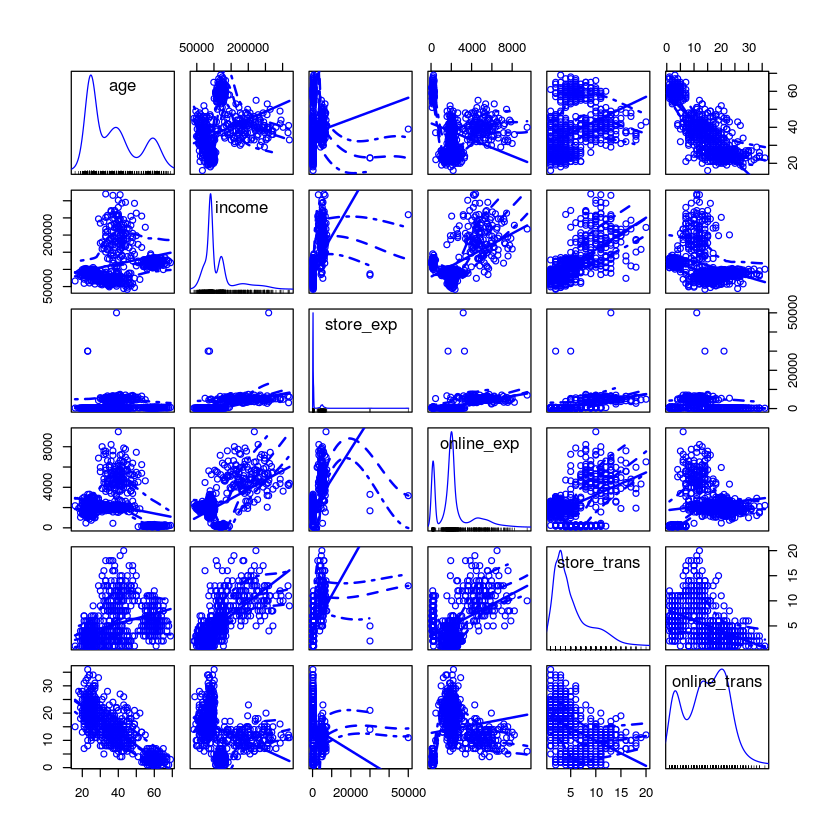

In [43]:
scatterplotMatrix(sdat,diagonal="boxplot",smoother=FALSE)

[1] 59

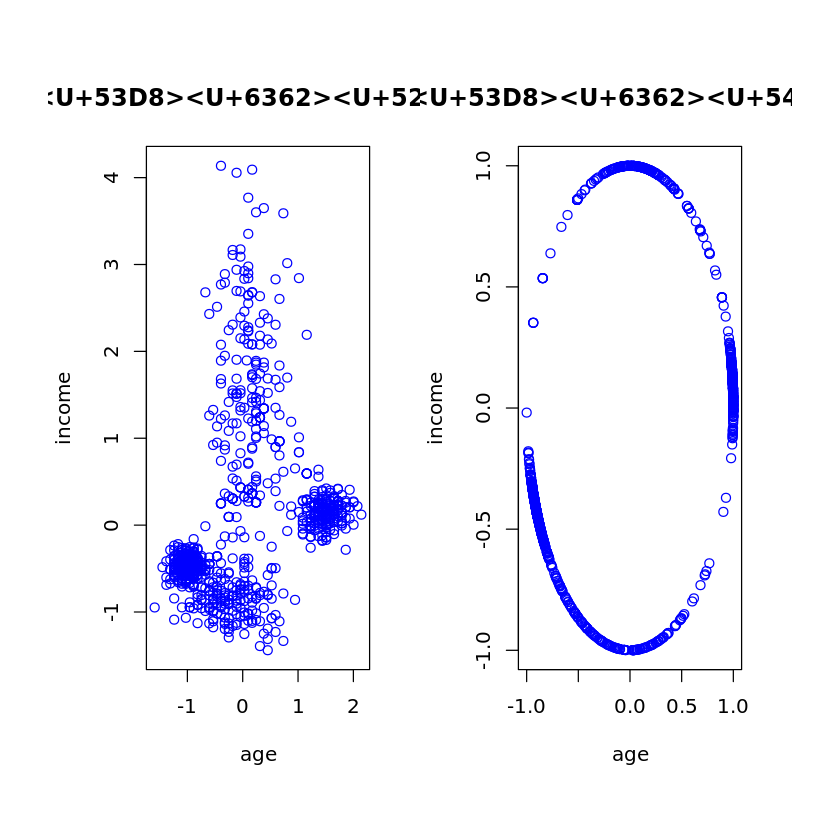

In [44]:
# 计算商店消费量的绝对离差中位数，这里用na.omit()告诉R忽略缺失值
ymad<-mad(na.omit(sdat$income))
# 计算Z分值
zs<-(sdat$income-mean(na.omit(sdat$income)))/ymad
# 看看有多少个离群点
sum(na.omit(zs>3.5))
# 用KNN填补缺失值
sdat<-sim.dat[,c("income","age")]
imp<-preProcess(sdat,method=c("knnImpute"),k=5)
sdat<-predict(imp,sdat)
transformed <- spatialSign(sdat)
transformed <- as.data.frame(transformed)
par(mfrow=c(1,2),oma=c(2,2,2,2))
plot(income ~ age,data = sdat,col="blue",main="变换前",family ="Songti SC")
plot(income ~ age,data = transformed,col="blue",main="变换后",family ="Songti SC")


In [45]:
sdat<-subset(sim.dat,select=c("age","income","store_exp","online_exp","store_trans","online_trans" ))

In [46]:
imp <- preProcess(sdat, method = "bagImpute")

In [47]:
sdat <- predict(imp, sdat)

In [48]:
correlation <- cor(sdat)

In [49]:
correlation

,age,income,store_exp,online_exp,store_trans,online_trans
age,1.0000000,0.2979485,0.0580609,-0.3380608,0.3608754,-0.8523079
income,0.2979485,1.0000000,0.6003472,0.5203073,0.7064026,-0.3567879
store_exp,0.0580609,0.6003472,1.0000000,0.5349530,0.5399096,-0.1367383
online_exp,-0.3380608,0.5203073,0.5349530,1.0000000,0.4420638,0.2256370
store_trans,0.3608754,0.7064026,0.5399096,0.4420638,1.0000000,-0.4367544
online_trans,-0.8523079,-0.3567879,-0.1367383,0.2256370,-0.4367544,1.0000000


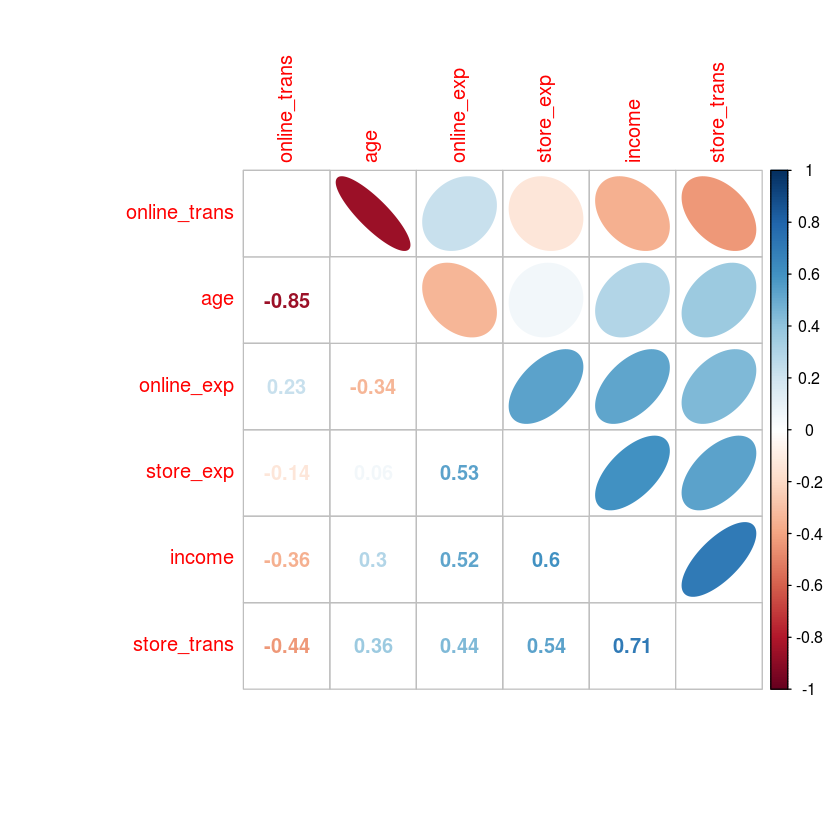

In [50]:
corrplot.mixed(correlation, order="hclust",tl.pos="lt",upper="ellipse")

In [51]:
highCorr <- findCorrelation(cor(sdat), cutoff = .75)

In [52]:
highCorr

[1] 1

In [53]:
dumVar <- class.ind(sim.dat$gender)

In [54]:
dumVar

Female,Male
1,0
1,0
0,1
0,1
0,1
0,1
0,1
0,1
1,0
0,1
